From Rxx, and Gideon, I learned about this applied SME signal boosting on quadradic funding. 

It means that the quadradic funding algorithm is weighted heavier from donors that qualify as SME.

Congrats to the TEC coordination team for pulling this off. They pulled this off on round 1.

Let's apply engineering to this process.

Engineering is about the production of artifacts in a safe and ethical way. 

Artifacts have interfaces that people may use. Engineering allows the usage of interfaces without bad things happening.



# TEC SME Signal Boost Quadradic Funding

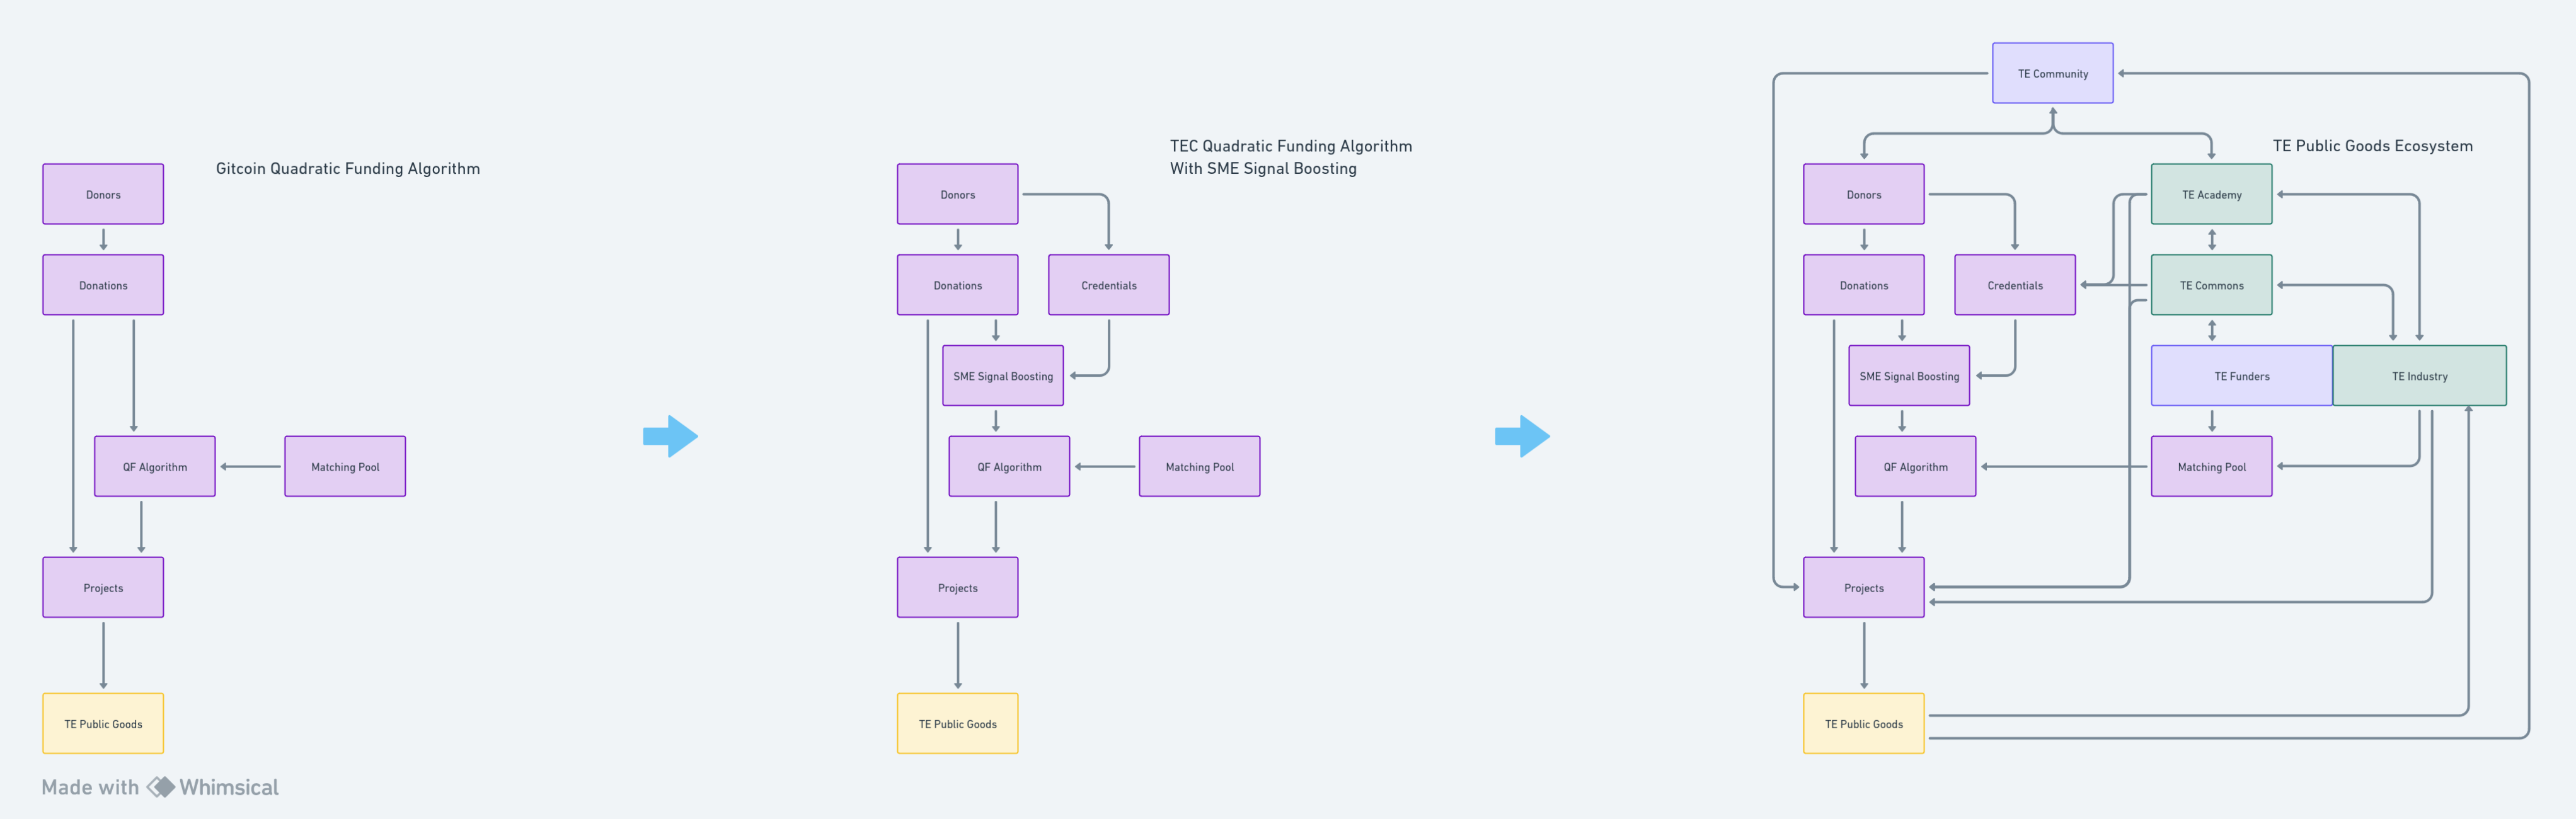![image.png]()

Link to the above board: https://whimsical.com/original-qfsme-mechanism-flowchart-QjXRdbkFmBcXBhnV175K9z 

Quadratic Funding Resources


* https://arxiv.org/pdf/2010.01193.pdf
* https://arxiv.org/pdf/1809.06421.pdf
* https://vitalik.ca/general/2019/12/07/quadratic.html
* https://qf.gitcoin.co/?grant=&grant=&grant=&match=1000
* https://medium.com/token-engineering-commons/expertise-and-quadratic-funding-bd4f0c5c3e23 

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

# A Flexible Design for Funding Public Goods

Bhuterin, Hitzig, Weyl on A Flexible Design for Funding Public Goods. 

https://arxiv.org/pdf/1809.06421.pdf

The following is a data science illustration of The foundational paper on FDFPGs. This is meant to be part one of a two part paper review, with a future modeling of Quadratic Funding and Matching Funds Requirments by Pasquini at Gitcoin. 

This worik is for educational purposes in the domain of token engineering. This work is meant to illustrate a data science approach to systems based modeling. This work is in the domain of digital signal processing, with primary foundations in machine learning, big data, data science, economics, and computing science, as those are the backgrounds of the primary authors. This work is funded by  with the Token Engineering Commons and Griff Green. 

## 3.0 Model

This is the foundational setup in the paper.

In [1]:
import numpy as np

# Number of Citizens in the Society
N = 30

# Society is a set of citizens
society = list(range(N))

# Community is a random subset of the society. The community size is from 25 up to size of the society.
community = np.random.choice(a=list(society), size=np.random.randint(25, len(society)), replace=False, p=None)

# Public Goods are proposed by community members. Cardinality is from 20 up to size of the community.
public_goods = list(enumerate(np.random.choice(a=list(community), size=np.random.randint(20, len(community)), replace=True, p=None)))

In [2]:
community

array([12, 21, 25,  5, 28, 20, 24, 29, 22, 26,  0, 10,  3, 17, 13,  8,  6,
       16, 18, 11,  7, 23, 14,  4, 19, 15])

In [3]:
public_goods

[(0, 11),
 (1, 22),
 (2, 24),
 (3, 17),
 (4, 16),
 (5, 29),
 (6, 6),
 (7, 19),
 (8, 3),
 (9, 5),
 (10, 22),
 (11, 23),
 (12, 8),
 (13, 17),
 (14, 28),
 (15, 8),
 (16, 4),
 (17, 0),
 (18, 16),
 (19, 0),
 (20, 7),
 (21, 29)]

In [4]:
len(society)

30

In [5]:
len(community)

26

In [6]:
len(public_goods)

22

## 3.1 Individual Preferences and Actions

The paper calls for Concave, Smooth, Increasing preferences towards the funding of public goods. In other words, every citizen benefits from the funding of any given public good, but by different amounts from each other and given the amount of funding the public good gets. The amount that a citizen i benefits from the funding of public good p given its funding level is V_p_i(F_p). This is the currency-equivalent utility citizen i receives if the funding of public good p is F_p.

### The Citizen Public Goods Value Functions Tensor

#### Concave Smooth Continuous Function Generator

In [7]:
import param
import numpy as np
import panel as pn
import hvplot.pandas
import pandas as pd

class ConcaveFunctionGenerator(param.Parameterized):
    f0 = param.Number(default=0.2, bounds=(0, 1), doc="Value of f(0)")
    f1 = param.Number(default=0.8, bounds=(0, 1), softbounds=(0, 1), doc="Value of f(1)")
    steepness = param.Number(default=5, bounds=(1, 20), doc="Steepness of the curve")

    def __init__(self, **params):
        super().__init__(**params)
        self._update_f1_bounds()

    @param.depends('f0', watch=True)
    def _update_f1_bounds(self):
        # Clip the value of f1 if it's below f0
        self.f1 = max(self.f0, self.f1)
        
        # Update the lower bound of f1 to be the value of f0
        self.param['f1'].bounds = (self.f0, 1)
        
    def x(self):
        return np.linspace(0, 1, 400)

    @param.depends('f0', 'f1', 'steepness')
    def f(self, x):
        # Using the negative exponential function as a base
        y = 1 - np.exp(-self.steepness * x)
        
        # Adjusting the function to start at f0 and end at f1
        y = self.f0 + (self.f1 - self.f0) * (y - y.min()) / (y.max() - y.min())
        
        return y

    @param.depends('f0', 'f1', 'steepness')
    def view(self):
        x = self.x()
        y = self.f(x)
        df = pd.DataFrame({'x': x, 'y': y})
        return df.hvplot.line(x='x', y='y', ylim=(0, 1.01))

concave_gen = ConcaveFunctionGenerator()
pn.Row(concave_gen.param, concave_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='ConcaveFunctionGenerator'...)
        [0] StaticText(value='<b>ConcaveFunctionGenerat...)
        [1] FloatSlider(name='F0', value=0.2)
        [2] FloatSlider(name='F1', start=0.2, value=0.8)
        [3] FloatSlider(end=20, name='Steepness', start=1, value=5)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

The concave value generator has the following properties:
1. f0 = f(0) is in [0,1]
2. f1 = f(1) is in [f0,1]
3. f(x) = 1 - e**(-s*x)
4. The negative exponential function provides a smooth, concave, increasing function from f0 to f1 with a parameterized steepness.

In [8]:
ConcaveFunctionGenerator(f0=1,f1=0)

ConcaveFunctionGenerator(f0=1, f1=1, name='ConcaveFunctionGenerator00955', steepness=5)

Here we propose parameter generators for sampling concave functions

#### Sampling Value Functions with Numbergen

This method generates random parameters given the distributions described for f0, f1, and steepness above. 


In [9]:
import numbergen as ng
import numpy as np


# For CurveGenerator
def concave_function_parameters_generator():
    return dict(
        f0=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.1, sigma=0.3), bounds=(0,1))(),
        f1=ng.BoundedNumber(generator=ng.NormalRandom(mu=0.5, sigma=0.4), bounds=(0,1))(),
        steepness=ng.UniformRandom(lbound=1, ubound=20)(),
    )

Running the above function samples value function initialization parameters.

In [10]:
concave_function_parameters_generator()

{'f0': 0.38615918637580204,
 'f1': 0.5392233623766329,
 'steepness': 17.978826706527425}

Sample a value function for each public good and each citizen.

In [11]:
value_function_params = [concave_function_parameters_generator() for V_p_i_params in range(len(public_goods)*len(society))]

Instantiate the value functions.

In [12]:
value_functions = [ConcaveFunctionGenerator(**V_p_i_params) for V_p_i_params in value_function_params]

Here we can see all of the preferences of the citizens. These are the value functions V_p_i(F_p). There is one preference function for each V_p_i in {public_goods}X{citizens}. Cardinality is len(public_goods)*len(citizens).

#### Citizen Public Goods Value Functions {V_p_i(F_p)}

In [88]:
import pandas as pd

pd.DataFrame([s.param.values() for s in value_functions])

sample_p_i_slider = pn.widgets.IntSlider(name='Utility Value Function', start=0, end=len(value_functions)-1)

pn.Row(sample_p_i_slider, pn.bind(lambda i: value_functions[i].view(), i=sample_p_i_slider))

Row
    [0] IntSlider(end=659, name='Utility Value Function')
    [1] ParamFunction(function, _pane=HoloViews, defer_load=False)

#### The Value Functions Tensor

Create a Dataframe! These are citizen preferences by funding amounts for public goods. Take Funding Amount as the Index by applying a transpose. 

In [89]:
df_value_functions = pd.DataFrame([s.f(s.x()) for s in value_functions])
df_value_functions = df_value_functions.T
df_value_functions.shape

(400, 660)

Make Funding the Index from 0 to 100

In [90]:
df_value_functions.index = np.linspace(0,1,len(df_value_functions))
df_value_functions.index.name = "funding"

Label the Columns by {public_goods}X{Citizens}.

In [91]:
df_value_functions.columns = [(p, i) for p in public_goods for i in society]
df_value_functions.columns.name = "value_p_i"

Number of columns is len(public_goods)*len(society).

In [92]:
df_value_functions

value_p_i,"((0, 11), 0)","((0, 11), 1)","((0, 11), 2)","((0, 11), 3)","((0, 11), 4)","((0, 11), 5)","((0, 11), 6)","((0, 11), 7)","((0, 11), 8)","((0, 11), 9)",...,"((21, 29), 20)","((21, 29), 21)","((21, 29), 22)","((21, 29), 23)","((21, 29), 24)","((21, 29), 25)","((21, 29), 26)","((21, 29), 27)","((21, 29), 28)","((21, 29), 29)"
funding,,,,,,,,,,,,,,,,,,,,,
0.000000,0.000000,0.000000,0.333804,0.344514,0.000000,0.023298,0.000000,0.328254,0.0,0.021821,...,0.079215,0.000000,0.135543,0.041358,0.000000,0.284116,1.0,0.000000,0.000000,0.000000
0.002506,0.005570,0.010217,0.336371,0.344514,0.021604,0.031773,0.022572,0.332868,0.0,0.051982,...,0.086883,0.047246,0.135543,0.051914,0.028215,0.284871,1.0,0.015243,0.016241,0.002010
0.005013,0.010995,0.020229,0.338903,0.344514,0.042161,0.040100,0.044211,0.337424,0.0,0.080859,...,0.094395,0.092260,0.135543,0.062355,0.055064,0.285620,1.0,0.030149,0.031707,0.003974
0.007519,0.016279,0.030042,0.341402,0.344514,0.061723,0.048282,0.064956,0.341921,0.0,0.108505,...,0.101757,0.135147,0.135543,0.072682,0.080615,0.286365,1.0,0.044724,0.046435,0.005893
0.010025,0.021425,0.039659,0.343867,0.344514,0.080337,0.056321,0.084845,0.346361,0.0,0.134972,...,0.108971,0.176008,0.135543,0.082897,0.104930,0.287104,1.0,0.058977,0.060459,0.007767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.989975,0.214183,0.511794,0.524819,0.344514,0.446000,0.509087,0.546370,0.687873,0.0,0.729539,...,0.460266,1.000000,0.135543,0.999446,0.583231,0.383362,1.0,0.688193,0.340214,0.086766
0.992481,0.214183,0.511798,0.524831,0.344514,0.446000,0.509095,0.546370,0.687902,0.0,0.729539,...,0.460268,1.000000,0.135543,0.999587,0.583231,0.383406,1.0,0.688195,0.340214,0.086766
0.994987,0.214183,0.511801,0.524844,0.344514,0.446000,0.509103,0.546370,0.687931,0.0,0.729539,...,0.460271,1.000000,0.135543,0.999726,0.583231,0.383450,1.0,0.688197,0.340214,0.086766


#### Visualizing the Value Functions Tensor

Display Citizen Preferences for Funding.

In [93]:
# df_value_functions.hvplot.line(x='funding', color='blue', alpha=0.1, line_width=3, ylabel='Value to Citizens', title='Smooth, Concave, Increasing Value Functions')

Mean preferences for funding public goods.

In [97]:
df_value_functions['mean'] = df_value_functions.mean(axis=1)
df_value_functions['std'] = df_value_functions.std(axis=1)
df_value_functions['low'] = df_value_functions['mean'] - df_value_functions['std']
df_value_functions['high'] = df_value_functions['mean'] + df_value_functions['std']

df_value_functions.hvplot.line(y='mean', ylabel='Value to Society') * df_value_functions.hvplot.area(y='low',y2='high', alpha=0.5, title='Mean Value to Society Given Funding')

:Overlay
   .Curve.I :Curve   [funding]   (mean)
   .Area.I  :Area   [funding]   (low,high)

Moving on.. Remove the stats columns.

In [98]:
df_value_functions.drop(['mean','std','low','high'],axis=1,inplace=True)

#### Melting The Value Functions Tensor

Melting preferences to get groupby on public good or on citizen.

In [99]:
df_value_functions_melted = df_value_functions.melt(ignore_index=False)
df_value_functions_melted['public_good'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[0]).astype(str)
df_value_functions_melted['citizen'] = df_value_functions_melted['value_p_i'].astype(str).apply(eval).apply(lambda x: x[1]).astype(str)
df_value_functions_melted

,value_p_i,value,public_good,citizen
funding,,,,
0.000000,"((0, 11), 0)",0.000000,"(0, 11)",0
0.002506,"((0, 11), 0)",0.005570,"(0, 11)",0
0.005013,"((0, 11), 0)",0.010995,"(0, 11)",0
0.007519,"((0, 11), 0)",0.016279,"(0, 11)",0
0.010025,"((0, 11), 0)",0.021425,"(0, 11)",0
...,...,...,...,...
0.989975,"((21, 29), 29)",0.086766,"(21, 29)",29
0.992481,"((21, 29), 29)",0.086766,"(21, 29)",29
0.994987,"((21, 29), 29)",0.086766,"(21, 29)",29


Each citizen i can make contributions to the funding of each public good p out of their resources c_p_i. The total utility then of citizen i is: [sum(V_p_i(F_p))  - c_p_i - t_i for all p in public_goods]

To calculate the above, we need F_p which is a vector of how much funding is achieved by each public good. We can sample a distribution of funding ammounts.

#### Exploring Utility by Citizen and Utility by Public Goods Given Funding Amounts by

Mean utility per funding of public good per citizen.

In [176]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='mean').hvplot.line(title='Mean utility per funding of public good per citizen.')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

Total utility per funding of public good.

In [177]:
df_value_functions_melted.pivot_table(index='funding', columns='public_good', values='value', aggfunc='sum').hvplot.line(title='Total utility per funding of public good.')

:NdOverlay   [public_good]
   :Curve   [funding]   (value)

Mean utility per citizen for funding the commons.

In [178]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='mean').hvplot.line(title='Mean utility per citizen for funding the commons.')

:NdOverlay   [citizen]
   :Curve   [funding]   (value)

Total utility per citizen for funding the commons.

In [179]:
df_value_functions_melted.pivot_table(index='funding', columns='citizen', values='value', aggfunc='sum').hvplot.line(title='Total utility per citizen for funding the commons.')

:NdOverlay   [citizen]
   :Curve   [funding]   (value)

Value Functions for Society

In [182]:
df_value_functions_pivot = df_value_functions_melted.pivot_table(index='funding', columns=['citizen','public_good'], values='value')
df_value_functions_pivot

citizen             0                                                  \
public_good   (0, 11) (1, 22)  (10, 22)  (11, 23)   (12, 8)  (13, 17)   
funding                                                                 
0.000000     0.000000     0.0  0.116663  0.295299  0.306183  0.000000   
0.002506     0.005570     0.0  0.148244  0.295299  0.330129  0.005704   
0.005013     0.010995     0.0  0.178523  0.295299  0.353214  0.011319   
0.007519     0.016279     0.0  0.207554  0.295299  0.375467  0.016846   
0.010025     0.021425     0.0  0.235388  0.295299  0.396920  0.022286   
...               ...     ...       ...       ...       ...       ...   
0.989975     0.214183     0.0  0.882842  0.295299  0.971386  0.364211   
0.992481     0.214183     0.0  0.882842  0.295299  0.971386  0.364223   
0.994987     0.214183     0.0  0.882842  0.295299  0.971386  0.364234   
0.997494     0.214183     0.0  0.882842  0.295299  0.971386  0.364245   
1.000000     0.214183     0.0  0.882842  0.295299  0.971386  0.364256   

citizen                                              ...         9            \
public_good  (14, 28)   (15, 8)   (16, 4)   (17, 0)  ...   (2, 24)   (20, 7)   
funding                                              ...                       
0.000000     0.367278  0.332606  0.186635  0.147360  ...  0.145397  0.436913   
0.002506     0.367278  0.338241  0.186635  0.160375  ...  0.153149  0.436913   
0.005013     0.367278  0.343713  0.186635  0.173178  ...  0.160745  0.436913   
0.007519     0.367278  0.349025  0.186635  0.185770  ...  0.168190  0.436913   
0.010025     0.367278  0.354182  0.186635  0.198156  ...  0.175485  0.436913   
...               ...       ...       ...       ...  ...       ...       ...   
0.989975     0.367278  0.526136  0.186635  0.940357  ...  0.532338  0.436913   
0.992481     0.367278  0.526136  0.186635  0.940376  ...  0.532341  0.436913   
0.994987     0.367278  0.526136  0.186635  0.940394  ...  0.532343  0.436913   
0.997494     0.367278  0.526137  0.186635  0.940413  ...  0.532346  0.436913   
1.000000     0.367278  0.526137  0.186635  0.940431  ...  0.532348  0.436913   

citizen                                                                  \
public_good  (21, 29)   (3, 17)   (4, 16)   (5, 29)    (6, 6)   (7, 19)   
funding                                                                   
0.000000     0.291745  0.000000  0.288216  0.000000  0.247342  0.297843   
0.002506     0.302990  0.040800  0.288216  0.002202  0.261019  0.315256   
0.005013     0.314056  0.079801  0.288216  0.004352  0.274432  0.331828   
0.007519     0.324947  0.117082  0.288216  0.006449  0.287586  0.347602   
0.010025     0.335666  0.152721  0.288216  0.008496  0.300487  0.362615   
...               ...       ...       ...       ...       ...       ...   
0.989975     0.999920  0.925481  0.288216  0.091415  0.956633  0.658920   
0.992481     0.999941  0.925481  0.288216  0.091415  0.956639  0.658920   
0.994987     0.999961  0.925481  0.288216  0.091416  0.956645  0.658920   
0.997494     0.999981  0.925481  0.288216  0.091416  0.956651  0.658920   
1.000000     1.000000  0.925481  0.288216  0.091416  0.956657  0.658920   

citizen                          
public_good    (8, 3)    (9, 5)  
funding                          
0.000000     0.288897  0.000000  
0.002506     0.290094  0.001912  
0.005013     0.291282  0.003780  
0.007519     0.292463  0.005605  
0.010025     0.293636  0.007387  
...               ...       ...  
0.989975     0.451733  0.082168  
0.992481     0.451812  0.082168  
0.994987     0.451890  0.082168  
0.997494     0.451968  0.082168  
1.000000     0.452045  0.082169  

[400 rows x 660 columns]

### The Contributions Matrix

#### Citizen Contributions Generator

Given a citizen i, this model selects a k public goods to donate to. The number of public goods to donate to is sampled from a beta decay centered at 8 in range [1,len(public_goods)].

Once k is sampled, a normal distribution of size k is sampled, and padded with 0s to be of size n. Then all is shuffled to distribute 0s randomly.

In [183]:
import numpy as np
from icecream import ic
ic.configureOutput(prefix='ic|',outputFunction=print)

n = len(public_goods)
ic(n)
k = int(np.clip(np.random.exponential(8), 1, n))
ic(k)
distribution = np.pad(np.abs(np.random.normal(size=k)), (0, n-k))
np.random.shuffle(distribution)
distribution /= distribution.sum()

ic|n: 22
ic|k: 7


In [184]:
import param
import panel as pn
import hvplot.pandas
import pandas as pd
import numpy as np
from icecream import ic

ic.configureOutput(prefix='ic|', outputFunction=print)

class CustomDistributionGenerator(param.Parameterized):
    n = param.Integer(default=100, bounds=(1, 1000), constant=True)
    mean_exponential = param.Integer(default=4, bounds=(1, 50))
    data = param.Array(precedence=-1)
    
    def __init__(self, **params):
        super().__init__(**params)
        self.generate_distribution()
    
    def f(self):
        k = int(np.clip(np.random.exponential(self.mean_exponential), 1, self.n))
        distribution = np.pad(np.abs(np.random.normal(size=k)), (0, self.n-k))
        np.random.shuffle(distribution)
        distribution /= distribution.sum()
        return distribution
    
    def x(self):
        return np.arange(self.n)
    
    @param.depends('n', 'mean_exponential', watch=True)
    def generate_distribution(self):
        self.data = self.f()
    
    @param.depends('data')
    def view(self):
        df = pd.DataFrame({'Value': self.data})
        return df.hvplot.step('index', 'Value', xlim=(0, self.n), ylim=(0, 1.01), title='Sample Public Goods Funding Amounts by Citizen ')

# Create an instance
dist_gen = CustomDistributionGenerator(n=len(public_goods))

# Use panel to render the interactive system
pn.Row(dist_gen.param, dist_gen.view).servable()


Row
    [0] Column(margin=(5, 10), name='CustomDistributionGenerat...)
        [0] StaticText(value='<b>CustomDistributionGene...)
        [1] IntSlider(disabled=True, end=1000, name='N', start=1, value=22)
        [2] IntSlider(end=50, name='Mean exponential', start=1, value=4)
    [1] ParamMethod(method, _pane=HoloViews, defer_load=False)

#### The Contributions Matrix

The above can be used to sample a contributions vector for each citizen to generate the contributions matrix. The matrix should be {society}X{public_good}

In [185]:
len(public_goods)

22

In [186]:
len(society)

30

Generate public goods funding contributions for each citizen in the society.

In [187]:
contributions = pd.DataFrame([CustomDistributionGenerator(n=len(public_goods)).data for i in society])

contributions.columns.name = 'Public Good'
contributions.index.name = 'Citizen'

contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.110250,0.000000,0.034259,0.000000,0.000000,0.000000,0.000000,0.460919,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.031875,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.526768,0.000000,0.015725,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.457507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222329,...,0.0,0.000000,0.155208,0.000000,0.063944,0.000000,0.000000,0.000000,0.000000,0.182655
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.804934,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.190680,0.267806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.541513
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.379724,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.620276,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [188]:
contributions.sum(axis=1)

Citizen
0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
dtype: float64

In [189]:
contributions.sum().sum()

30.000000000000004

#### Citizen Preferences

In [190]:
contributions.hvplot.heatmap(title="Citizen Contributions Distribution", cmap='Blues', fontscale=1.2, width=800, height=800, xlabel='Public Good', ylabel='Citizen', clabel='Amount Contributed from citizen i to public_good p.').opts(default_tools=[])

:HeatMap   [columns,index]   (value)

#### Public Goods Funding Distribution

In [227]:
public_goods_funding_distribution = contributions.sum()

In [228]:
public_goods_funding_distribution.to_frame().sort_values(0,ascending=False).reset_index(drop=True).hvplot(title='Public Goods Funding Distribution', xlabel='Public Good', ylabel='Funding')

:Curve   [index]   (0)

In [231]:
public_goods_funding_distribution

Public Good
0     0.119630
1     0.369180
2     1.690949
3     3.545510
4     0.414454
5     1.272564
6     1.908875
7     0.430422
8     1.365913
9     2.498053
10    2.256687
11    2.764681
12    0.000000
13    2.441437
14    0.934125
15    0.328282
16    1.662277
17    0.858640
18    0.469818
19    0.370180
20    3.165125
21    1.133197
dtype: float64

In [234]:
public_goods_funding_distribution.sum()

30.000000000000004

### The Funding Value Matrix

In [262]:
funding_value_tensor = df_value_functions_pivot.iloc[df_value_functions_pivot.index.get_indexer(public_goods_funding_distribution.values, method='nearest')]

The value produced given the current public goods funding distribution.

In [263]:
values = funding_value_tensor.unstack().values.reshape(len(funding_value_tensor), len(funding_value_tensor.columns.levels[0]), len(funding_value_tensor.columns.levels[1]))

# Extract the diagonal plane
funding_values = values[np.arange(values.shape[0]), :, np.arange(values.shape[2])]
funding_values = pd.DataFrame(funding_values, index=public_goods, columns=society)
funding_values.index.name = "public_goods"
funding_values.columns.name = "citizens"
funding_values

citizens,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
public_goods,,,,,,,,,,,,,,,,,,,,,
"(0, 11)",0.153719,0.000000,0.781247,0.295299,0.856920,0.193611,0.367278,0.479289,0.186635,0.582242,...,0.383348,0.486733,0.317415,0.728868,0.273786,0.331306,0.310542,0.334828,0.186672,0.335891
"(1, 22)",0.792815,0.325708,0.573599,0.437610,0.278348,0.703336,0.567514,0.000000,0.849925,0.147320,...,0.386842,0.650509,0.159342,0.518926,0.721713,0.607625,0.000000,0.571768,0.436147,0.818902
"(2, 24)",0.864936,0.512789,0.440518,0.376669,0.412328,1.000000,0.395647,1.000000,0.000000,0.440968,...,0.562302,0.125824,0.837587,0.926181,0.126167,0.635953,0.976744,0.426500,0.316018,0.376467
"(3, 17)",0.649485,0.704003,0.329880,0.386893,0.470695,0.337981,0.725993,0.883954,0.546461,1.000000,...,0.438843,0.000000,1.000000,0.236848,0.843123,1.000000,0.925412,0.016716,0.753076,0.157439
"(4, 16)",0.318573,0.393508,0.320914,0.710507,0.581199,0.996763,0.358312,0.179130,0.645060,0.262541,...,0.430386,0.962772,0.531692,0.998937,0.453007,0.998385,0.936752,0.482421,0.250829,0.951529
"(5, 29)",0.454537,0.560648,0.833031,1.000000,0.342703,0.136533,0.184593,0.478965,0.926905,0.077854,...,0.473001,0.808974,0.517414,0.394237,0.269234,0.659778,0.310658,0.148713,0.002086,0.607022
"(6, 6)",0.397958,0.483465,0.520660,0.681619,0.431095,0.647629,0.951272,0.661148,0.656570,0.557526,...,0.098170,0.566729,0.000000,0.738642,0.416356,0.858960,0.382554,0.256960,0.833724,0.333563
"(7, 19)",0.251831,0.712563,0.097237,0.988466,0.459204,0.966336,0.242950,0.718877,0.869850,0.594969,...,0.534931,0.998779,0.106733,0.603772,0.084437,0.424501,0.940971,0.389143,0.567545,0.635617
"(8, 3)",0.323248,0.102456,0.287639,1.000000,0.142227,0.338282,0.442449,0.519293,0.652228,0.602915,...,0.097012,0.250281,0.365235,0.257287,0.524868,0.674250,0.283877,0.913003,1.000000,0.134097


#### The net value being generated for each citizen after funding.

In [276]:
funding_values.sum()

citizens
0     11.146820
1     11.235990
2     11.830071
3     12.848721
4     11.533311
5     13.136796
6     10.428019
7     12.487198
8     13.330115
9     10.203123
10     7.427562
11    13.358746
12    11.842770
13    13.708462
14    11.044785
15    13.346995
16     9.951116
17    10.986108
18     9.712134
19    10.985229
20     9.693371
21    12.910322
22    11.987122
23    12.082318
24     9.024146
25    15.444155
26    10.256272
27     8.163786
28    10.305599
29    11.897833
dtype: float64

#### The net value being generated by each public good after funding.

In [277]:
funding_values.sum(axis=1)

public_goods
(0, 11)     12.492799
(1, 22)     13.938826
(2, 24)     15.835840
(3, 17)     17.029037
(4, 16)     18.388460
(5, 29)     13.992790
(6, 6)      14.591066
(7, 19)     16.818026
(8, 3)      13.756543
(9, 5)      16.566884
(10, 22)    17.871414
(11, 23)    16.385542
(12, 8)      4.429296
(13, 17)    16.336909
(14, 28)    16.104164
(15, 8)     16.160510
(16, 4)     16.728118
(17, 0)     17.220863
(18, 16)    16.584243
(19, 0)     14.439621
(20, 7)     18.206793
(21, 29)    18.431253
dtype: float64

Taxes

In [278]:
taxes = pd.Series([0.05] * len(society), name='Taxes')
taxes

0     0.05
1     0.05
2     0.05
3     0.05
4     0.05
5     0.05
6     0.05
7     0.05
8     0.05
9     0.05
10    0.05
11    0.05
12    0.05
13    0.05
14    0.05
15    0.05
16    0.05
17    0.05
18    0.05
19    0.05
20    0.05
21    0.05
22    0.05
23    0.05
24    0.05
25    0.05
26    0.05
27    0.05
28    0.05
29    0.05
Name: Taxes, dtype: float64

### Net Citizen Utility After Funding

In [279]:
citizen_utility = funding_values.sum() - contributions.sum(axis=1) - taxes

In [280]:
citizen_utility.to_frame(name='citizen_utility')

,citizen_utility
citizens,
0,10.096820
1,10.185990
2,10.780071
3,11.798721
4,10.483311
5,12.086796
6,9.378019
7,11.437198
8,12.280115


## 3.2 Funding Mechanisms

A funding mechanism in our flexible public goods setting defines the total amount of funding received for each good in the set P:

In [281]:
contributions.sum(axis=0)

Public Good
0     0.119630
1     0.369180
2     1.690949
3     3.545510
4     0.414454
5     1.272564
6     1.908875
7     0.430422
8     1.365913
9     2.498053
10    2.256687
11    2.764681
12    0.000000
13    2.441437
14    0.934125
15    0.328282
16    1.662277
17    0.858640
18    0.469818
19    0.370180
20    3.165125
21    1.133197
dtype: float64

Given all individual contributions c_i_p:

In [282]:
contributions

Public Good,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Citizen,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.110250,0.000000,0.034259,0.000000,0.000000,0.000000,0.000000,0.460919,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.031875,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.526768,0.000000,0.015725,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.457507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222329,...,0.0,0.000000,0.155208,0.000000,0.063944,0.000000,0.000000,0.000000,0.000000,0.182655
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.804934,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.190680,0.267806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.541513
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.379724,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.620276,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



Formally, a mechanism is: 
* A mapping from the set of all individual contributions to funding levels for all goods. 
* The set of individual contributions is comprised of vectors c_p = (c_p_1, c_p_2, ..., c_p_N) where subscripts index citizens. Thus, c_p is a vector in RN
* we denote C[P] the space of all possible collections of funding levels for each good p given contributions from the N citizens, i.e. {c_p} for p in P. The set of all final funding levels for all goods p in P is the set F, which has [P] real-valued elements F=(F_1, F_2, ..., F[P], with F_p in R.

